In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [22]:
train_data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


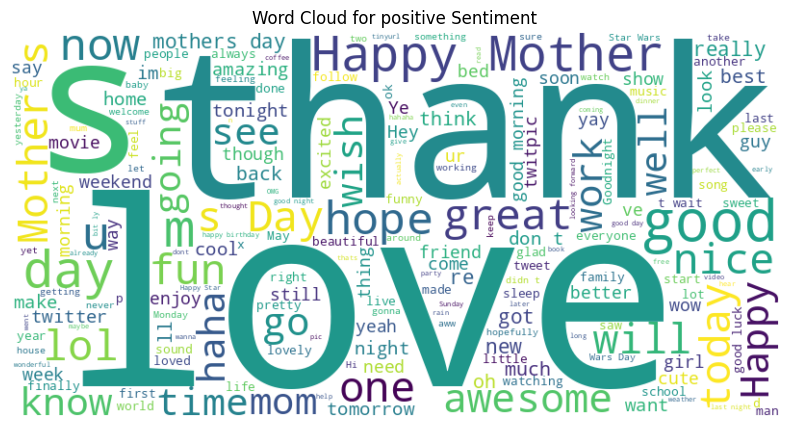

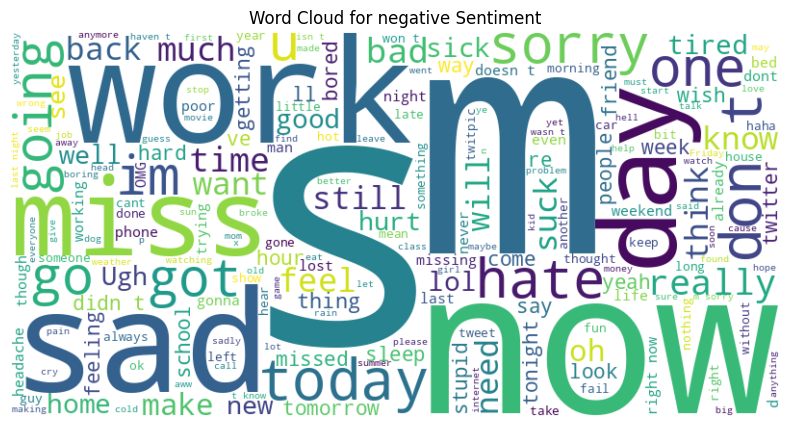

TypeError: sequence item 134: expected str instance, float found

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from wordcloud import WordCloud

sentiments = ['positive', 'negative', 'neutral']
for sentiment in sentiments:
    text = ' '.join(train_data[train_data['sentiment'] == sentiment]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()


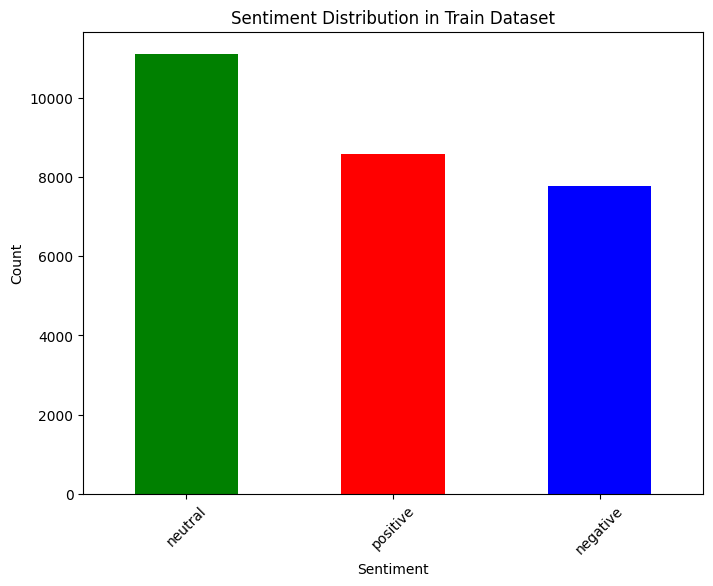

In [18]:
sentiment_counts = train_data['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution in Train Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


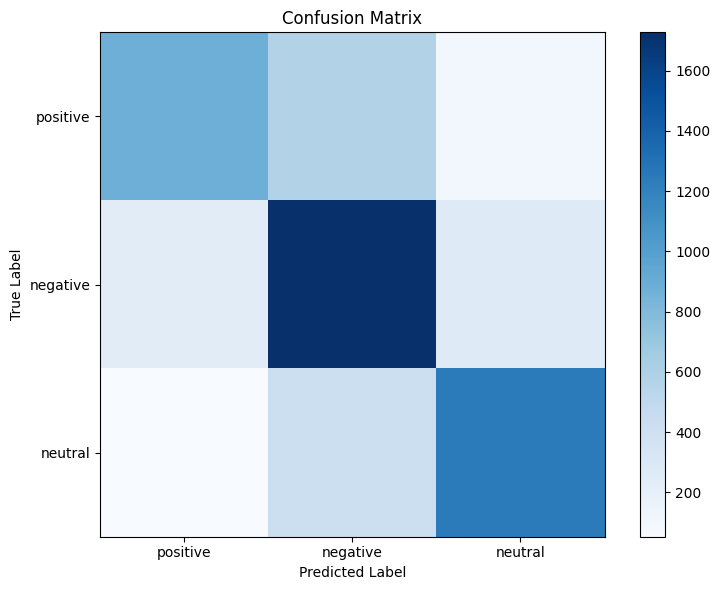

In [19]:
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=np.arange(len(sentiments)), labels=sentiments)
plt.yticks(ticks=np.arange(len(sentiments)), labels=sentiments)
plt.tight_layout()
plt.show()


In [ ]:
top_words = top_positive_words + top_negative_words
top_coefficients = coefficients[np.argsort(coefficients)[-10:]] + coefficients[np.argsort(coefficients)[:10]]
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(top_words)), top_coefficients, color=['green' if c >= 0 else 'red' for c in top_coefficients])
plt.yticks(np.arange(len(top_words)), top_words)
plt.title('Top Words and Their Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Word')
plt.show()

In [8]:
def preprocess_text(text):
    if isinstance(text, str):

        text = text.lower()

        tokens = word_tokenize(text)

        stop_words = set(stopwords.words('english'))

        filtered_tokens = [word for word in tokens if word not in stop_words]

        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

        preprocessed_text = ' '.join(lemmatized_tokens)
        return preprocessed_text
    else:
        return ''

In [9]:
train_data['text'] = train_data['text'].apply(preprocess_text)
test_data['text'] = test_data['text'].apply(preprocess_text)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(train_data['text'], train_data['sentiment'], test_size=0.2, random_state=42)

In [11]:
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(test_data['text'])

In [12]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [13]:
y_val_pred = svm_classifier.predict(X_val_tfidf)

In [14]:
accuracy = accuracy_score(y_val, y_val_pred)
print("Accuracy on validation set:", accuracy)
print("Classification Report on validation set:")
print(classification_report(y_val, y_val_pred))

Accuracy on validation set: 0.6998362743314536
Classification Report on validation set:
              precision    recall  f1-score   support

    negative       0.75      0.56      0.64      1562
     neutral       0.63      0.77      0.70      2230
    positive       0.77      0.73      0.75      1705

    accuracy                           0.70      5497
   macro avg       0.72      0.69      0.70      5497
weighted avg       0.71      0.70      0.70      5497



In [15]:
y_test_pred = svm_classifier.predict(X_test_tfidf)


In [16]:
# Save predictions to a CSV file
test_data['predicted_sentiment'] = y_test_pred
test_data.to_csv('predicted_test.csv', index=False)